### Decide whick K is the best for the algorithm? 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Generate random data

In [14]:
n_points = 100
X1 = np.random.multivariate_normal([1,50],[[1,0],[0,10]],n_points)
X2 = np.random.multivariate_normal([2,50],[[2,0],[0,10]],n_points)
print(X1.shape,X2.shape)# 100 2 100 2

X = np.concatenate([X1,X2])
y = np.array([0]*n_points + [1]*n_points)
print(X.shape,y.shape)# 200 2 200

(100, 2) (100, 2)
(200, 2) (200,)


### KNN Train

In [26]:
clfs = []
neighbors = [x for x in range(1,20,2)]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))

### Visualisation

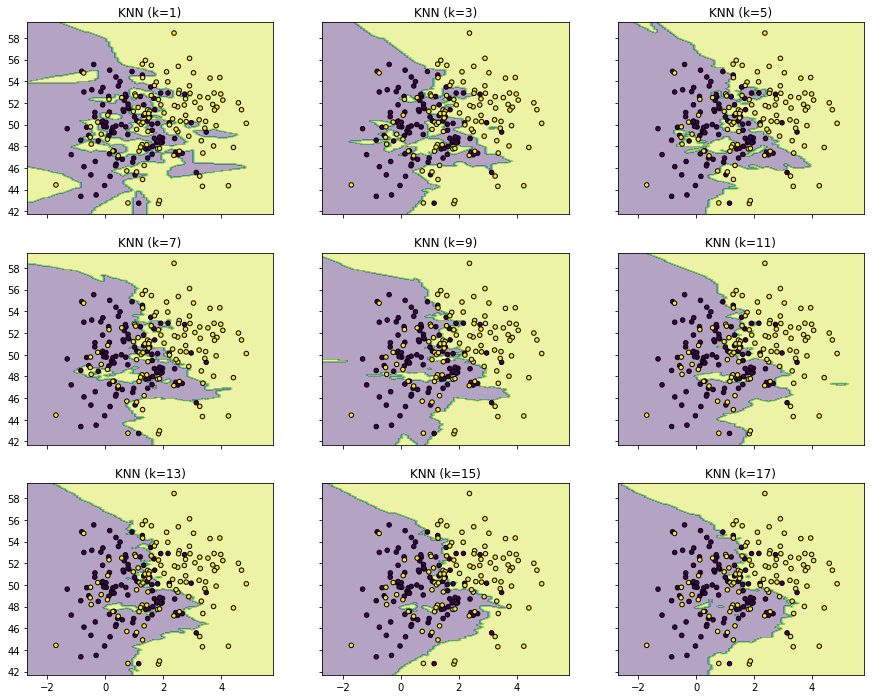

In [29]:
x_min,x_max = X[:,0].min() - 1,X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1,X[:,1].max() + 1

# Create a Cartesian coordinate system 
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),
                   np.arange(y_min,y_max,0.1))

f,axarr = plt.subplots(3,3,sharex='col',sharey='row',figsize=(15,12))
for idx,clf,tt in zip(product([0,1,2],[0,1,2]),
                      clfs,
                      ['KNN (k=%d)'%k for k in neighbors]):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha=0.4)
    axarr[idx[0],idx[1]].scatter(X[:,0],X[:,1],c=y,s=20,edgecolor='k')
    axarr[idx[0],idx[1]].set_title(tt)
    
plt.show()